# An Empirical Exploration of Web Purchase Determinants

### Abstract

This study investigates the factors influencing web purchases through a multiple linear regression analysis. The dataset comprises 2240 observations, with "Web Purchases" as the dependent variable and a set of predictor variables including demographic and socio-economic factors. The results reveal insights into the significance and impact of various predictors on online shopping behavior.

### 1. Introduction

In the realm of marketing, understanding the nuances of customer behavior is crucial for effective campaigns. This study focuses on dissecting the data from a marketing campaign conducted by Maven Marketing. The dataset includes customer profiles, product preferences, campaign outcomes, and channel performance. Our primary interest lies in the online channel, specifically web purchases, with the aim of unraveling the demographics associated with online buyers.

As businesses strive to optimize online marketing strategies, a comprehensive understanding of the determinants of web purchase frequency becomes imperative. This research addresses the critical question of what factors significantly impact the number of web purchases made by customers.

By delving into customer profiles, we seek to uncover patterns that can inform future marketing strategies. This exploration aims to shed light on the demographic characteristics of individuals who engage in online purchases.We hypothesize that age may exert a negative influence on the frequency of online purchases, while education level may positively impact the likelihood of engaging in online transactions. The study employs multiple linear regression to explore the relationships between demographic and socio-economic variables and the frequency of web purchases.

### 2. Research Methodology

This study adopts a cross-sectional design, capturing a snapshot of customer attributes and web purchase behavior at a specific point in time. The dataset comprises marketing campaign data from Maven Marketing, encompassing 2,240 customers. In this section, we will explore key features of the dataset and present relevant descriptive tables to provide a comprehensive understanding. 

Each entry in the filtered dataset corresponds to a unique customer, identified by an individual ID. Demographic information includes attributes such as 'Year_Birth,' 'Education,' 'Marital_Status,' 'Income,' and details regarding the presence of children in the household ('Kidhome' and 'Teenhome').

The data contains the following variables:
- Year_Birth: The customer's year of birth
- Education: The customer's level of education (high school, college, or postgraduate)
- Marital_Status: The customer's marital status (single, married, divorced, or widowed)
- Income: The customer's annual income
- kidhome: Whether or not the customer has children living at home
- teenhome: Whether or not the customer has teenage children living at home
- NumWebPurchases: The number of web purchases made by the customer in the past year

Linear regression is selected as the primary modeling technique, given its suitability for exploring relationships between continuous dependent and independent variables in this context. Assumptions underlying the regression analysis include linearity, independence, homoscedasticity, and normality of residuals. Each assumption is carefully considered and discussed in subsequent sections.

### 3. Data Analysis

### 3.1 Descriptive Statistics

Descriptive statistics will present a summary of key variables, providing insights into the central tendencies and variations within the dataset.

In [1]:
import pandas as pd
from IPython.display import Markdown
from tabulate import tabulate
import os

# Load the CSV file into a DataFrame
marketing_data = pd.read_csv("https://raw.githubusercontent.com/kocakale/hello-world/master/marketing_data.csv")

In [2]:
# Remove trailing whitespaces from column names
marketing_data.columns = marketing_data.columns.str.strip()

# Select only the columns for analysis
selected_columns = ["NumWebPurchases", "Year_Birth", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome"]
marketing_data = marketing_data[selected_columns]
marketing_data = marketing_data.rename(columns={"NumWebPurchases": "Web Purchases", "Year_Birth":"Birth Year", 
                                                "Marital_Status":"Marital Status", "Kidhome": "Kids", "Teenhome": "Teens"})

# Summary statistics for numerical columns
numerical_summary = marketing_data.describe()

# Tabulate and display the table
table_str = tabulate(numerical_summary, headers='keys', tablefmt='fancy_grid', colalign=('left', 'right', 'right', 'right', 'right', 'right'))

print("Summary Statistics for Numerical Columns:")
print(table_str)

Summary Statistics for Numerical Columns:
╒═══════╤═════════════════╤══════════════╤══════════╤══════════╤══════════╕
│       │   Web Purchases │   Birth Year │   Income │     Kids │    Teens │
╞═══════╪═════════════════╪══════════════╪══════════╪══════════╪══════════╡
│ count │            2240 │         2240 │     2216 │     2240 │     2240 │
├───────┼─────────────────┼──────────────┼──────────┼──────────┼──────────┤
│ mean  │         4.08482 │      1968.81 │  52247.3 │ 0.444196 │  0.50625 │
├───────┼─────────────────┼──────────────┼──────────┼──────────┼──────────┤
│ std   │         2.77871 │      11.9841 │  25173.1 │ 0.538398 │ 0.544538 │
├───────┼─────────────────┼──────────────┼──────────┼──────────┼──────────┤
│ min   │               0 │         1893 │     1730 │        0 │        0 │
├───────┼─────────────────┼──────────────┼──────────┼──────────┼──────────┤
│ 25%   │               2 │         1959 │    35303 │        0 │        0 │
├───────┼─────────────────┼──────────────┼────

The mean number of web purchases stands at 4.08, with a standard deviation of 2.78, indicating a moderate level of variability in customer behavior. The range spans from 0 to 27, portraying diversity in web purchasing patterns, with a concentration observed between 2 and 6 transactions.
Analysis of birth years reveals a heterogeneous age distribution among customers, characterized by an average birth year of 1968.81. The standard deviation of 11.98 emphasizes a notable spread, spanning from 1893 to 1996, underscoring the dataset's representation of a broad age spectrucome.
The mean income is approximately 52,247 US Dollars (USD), accompanied by a standard deviation of 25,173 USD, indicative of significant income diversity within the customer base. The income range extends from 1,730 USD to 666,666 USD, reflecting the economic heterogeneity of the sampled population.

In [3]:
# Display summary for categorical variable "Education"
education_counts = marketing_data["Education"].value_counts()
education_table = pd.DataFrame({'Education': education_counts.index, 'Education Count': education_counts.values})

print("Summary for Categorical Variable 'Education':")
print(tabulate(education_table, headers='keys', tablefmt='fancy_grid', showindex=False))

# Display summary for categorical variable "Marital Status"
marital_status_counts = marketing_data["Marital Status"].value_counts()
marital_status_table = pd.DataFrame({'Marital Status': marital_status_counts.index, 'Marital Status Count': marital_status_counts.values})

print("\nSummary for Categorical Variable 'Marital Status':")
print(tabulate(marital_status_table, headers='keys', tablefmt='fancy_grid', showindex=False))

Summary for Categorical Variable 'Education':
╒═════════════╤═══════════════════╕
│ Education   │   Education Count │
╞═════════════╪═══════════════════╡
│ Graduation  │              1127 │
├─────────────┼───────────────────┤
│ PhD         │               486 │
├─────────────┼───────────────────┤
│ Master      │               370 │
├─────────────┼───────────────────┤
│ 2n Cycle    │               203 │
├─────────────┼───────────────────┤
│ Basic       │                54 │
╘═════════════╧═══════════════════╛

Summary for Categorical Variable 'Marital Status':
╒══════════════════╤════════════════════════╕
│ Marital Status   │   Marital Status Count │
╞══════════════════╪════════════════════════╡
│ Married          │                    864 │
├──────────────────┼────────────────────────┤
│ Together         │                    580 │
├──────────────────┼────────────────────────┤
│ Single           │                    480 │
├──────────────────┼────────────────────────┤
│ Divorced         │

Summary table for education levels provides a snapshot of individuals categorized by their education levels. Notably, there is a significant count in the "Graduation" category (1127), followed by individuals with a PhD (486) and a Master's degree (370). To enhance clarity, we are going to merge "2nd Cycle" with "Master's Degree" and consider grouping "Basic" education with "Graduation". This consolidation aims to simplify the analysis and interpretation of education levels within the dataset.

The summary for 'Marital Status' outlines the distribution of individuals across various marital statuses. Before conducting regression analysis, similar labels will be grouped under fewer variables to enhance interpretability. The data includes conventional categories like 'Married' and 'Single' alongside unconventional ones like 'YOLO' and 'Absurd'.

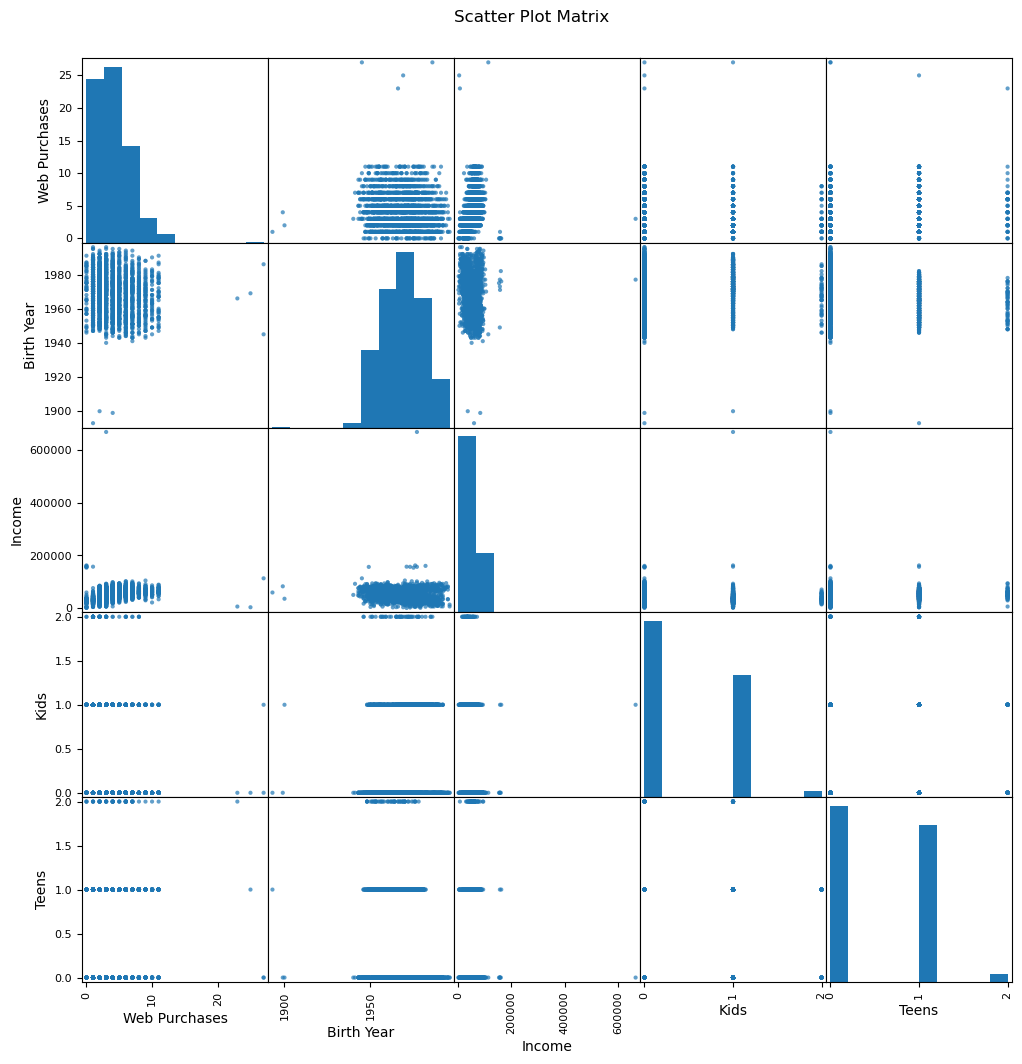

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Scatter plot matrix
scatter_matrix(marketing_data, alpha=0.7, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Plot Matrix", y=0.92)
plt.show()

Based on the scatter matrix, it appears that there is a positive correlation between 'Income' and 'Birth Year.' Specifically, the data suggests that younger individuals tend to have a higher number of web purchases.

In [5]:
# Print the summary of NaN values
print("Summary of NaN values:")
print(marketing_data.isna().sum())

Summary of NaN values:
Web Purchases      0
Birth Year         0
Education          0
Marital Status     0
Income            24
Kids               0
Teens              0
dtype: int64


In [6]:
marketing_data = marketing_data.dropna(axis=0)
print("DataFrame after removing rows with NaN values:")
print(marketing_data.isna().sum())

DataFrame after removing rows with NaN values:
Web Purchases     0
Birth Year        0
Education         0
Marital Status    0
Income            0
Kids              0
Teens             0
dtype: int64


Before splitting data and running the regression, we need to execute some data cleaning steps. It would be nice to clear outliers, merge some of the categorical variables in education and marital status columns and finally rescale income column by taking its natural logarithm.

In [7]:
import numpy as np
import datetime as dt

# Merge "2nd Cycle" with "Master's Degree" and group "Basic" with "Graduation" in "Education"
marketing_data['Education'] = marketing_data['Education'].replace({'2n Cycle': "Master", 'Basic': 'Graduation'})

# Group "Single", "Divorced", "Widow", and "Alone" as "Single" in "Marital Status"
marketing_data['Marital Status'] = marketing_data['Marital Status'].replace({'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single'})

# Remove rows with "YOLO" and "Absurd" labels in "Marital_Status"
marketing_data = marketing_data[~marketing_data['Marital Status'].isin(['YOLO', 'Absurd'])]

# Convert 'Birth Year' to datetime
marketing_data['Birth Year'] = pd.to_datetime(marketing_data['Birth Year'], format='%Y')

# Calculate age based on the current year. It would be better to use "Age" in regression instead of "Birth Year"
current_year = dt.datetime.now().year
marketing_data['Age'] = current_year - marketing_data['Birth Year'].dt.year

# Adding a new column 'Log_Income' with the logarithm of 'Income'
marketing_data['Log_Income'] = np.log(marketing_data['Income'])

# Create 95 percentiles for Log Income and Age
percentiles_log_income = np.percentile(marketing_data['Log_Income'], 95)
percentiles_age = np.percentile(marketing_data['Age'], 95)

# Filter rows based on the 95th percentile for log(Income) and log(Age)
marketing_data = marketing_data[(marketing_data['Log_Income'] <= percentiles_log_income) & (marketing_data['Age'] <= percentiles_age)]


### 3.2 Regression Results

The first step after reviewing the data and performing the necessary data cleaning is fitting a linear regression model to understand the relationship between web purchases and various customer attributes. We divide our data into training and testing sets, allowing us to train the model on one subset and evaluate its performance on another.

After careful data cleaning steps, we can apply the first model to estimate linear relationship between web purchases and other explanatory and control variables.

In [8]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

# Divide data into training and testing sets
X = marketing_data.drop(["Web Purchases","Birth Year", "Income"], axis=1)
y = marketing_data["Web Purchases"]

# Convert "Education" and "Marital_Status" to categorical variables
X = pd.get_dummies(X, columns=["Education", "Marital Status"], drop_first=True)
X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
X_train_sm = sm.add_constant(X_train)  # add a constant term to the predictor
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the summary table
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Web Purchases   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     60.12
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           6.11e-86
Time:                        17:12:43   Log-Likelihood:                -3657.1
No. Observations:                1598   AIC:                             7332.
Df Residuals:                    1589   BIC:                             7381.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

The regression model demonstrates overall significance (F-statistic: 60.12, Prob (F-statistic): 6.11e-86), indicating that at least one predictor variable is influential. Among the predictors, "Kids," "Teens," and "log(Income)" emerge as statistically significant contributors to web purchases, as evidenced by low p-values (P>|t|) associated with their coefficients.

The presence of "Kids" exhibits a negative association with web purchases, suggesting that individuals with children tend to engage in fewer online transactions.
Conversely, the variable "Teens" shows a positive association, indicating an increase in web purchases among individuals with teenagers.

Although "log(Income)" is a significant positive predictor, suggesting that higher income levels correlate with increased web purchases, the coefficient is quite small and the effect appears to be limited. 

"Age" does not show a statistically significant impact on web purchases in this analysis.

Variables related to education and marital status ("Education_Master," "Education_PhD," "Marital Status_Single," and "Marital Status_Together") do not exhibit strong significance in predicting web purchases.

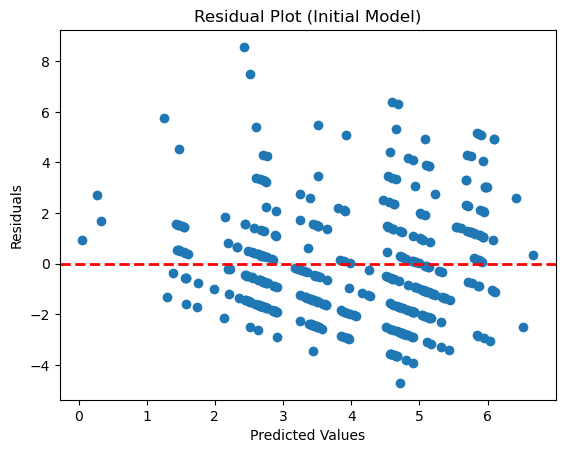

In [9]:
# Residual plot for Initial Regression Results
residuals = y_test - model_sm.predict(sm.add_constant(X_test))
plt.scatter(model_sm.predict(sm.add_constant(X_test)), residuals)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Initial Model)')
plt.show()

The scatter plot of residuals against predicted values indicates a lack of homoscedasticity. Consequently, it is necessary to explore alternative models for a more suitable fit.

### 3.3 Model Fit

The R-squared value of 0.232 indicates that the model explains approximately 23.2% of the variability in web purchases.
The adjusted R-squared adjusts for the number of predictors in the model, providing a more conservative estimate of model fit (Adj. R-squared: 0.228).

The Omnibus, Durbin-Watson, and Jarque-Bera tests suggest potential issues with the normality of residuals. Further investigation into the distribution of residuals is needed.
The condition number (1.05e+03) indicates the presence of multicollinearity, urging caution in the interpretation of individual coefficients.

In [10]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error (MSE) on training and testing sets for the initial model
X_test_sm = sm.add_constant(X_test)  # add a constant term to the predictor

mse_train_init = mean_squared_error(y_train, model_sm.predict(X_train_sm))
mse_test_init = mean_squared_error(y_test, model_sm.predict(X_test_sm))

print("Mean squared error (training) (initial model):", mse_train_init)
print("Mean squared error (testing) (initial model):", mse_test_init)

Mean squared error (training) (initial model): 5.692700611259808
Mean squared error (testing) (initial model): 4.951242307526587


In terms of mean squared error (MSE), our initial model seems to perform reasonably well, with a moderate level of error on the training set and slightly lower error on the testing set. It's important to consider these metrics in the context of specific problem and domain, and we have to compare them to other models with additional evaluation metrics for a more comprehensive assessment.

In [11]:
# Perform cross-validation to assess the generalizability of the initial model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

def predict_wrapper(y_true, y_pred, model):
    return mean_squared_error(y_true, y_pred)

# Create a dummy estimator (it won't be used during cross-validation)
dummy_estimator = DummyRegressor(strategy='mean')

# Create a custom scoring function using the statsmodels model for prediction
scorer = make_scorer(predict_wrapper, model=model_sm)

# Use cross_val_score with the dummy estimator and the custom scoring function
scores_init = cross_val_score(estimator=dummy_estimator, X=X, y=y, cv=5, scoring=scorer)

In [12]:
scores_init

array([7.51564509, 7.43582837, 7.29691224, 6.03146565, 8.3068421 ])

Cross-validation is a technique used to assess the performance and generalizability of a statistical or machine learning model.Cross-validation involves partitioning the dataset into multiple subsets, training the model on some of these subsets, and evaluating its performance on the remaining data.

A cross-validated mean squared error of 7.5 suggests that, on average, the squared differences between our model's predictions and the actual values (web purchases) are around 7.5. Lower values would be preferable, indicating better model performance.Given that our main objective is not prediction but rather the identification of causal correlations between variables, we can proceed to conduct a more in-depth analysis of the model's performance by comparing it with alternative models.

### 3.4 Alternative Models

To ensure the robustness of our findings, we conduct additional checks. We explore two robustness checks: Polynomial Regression and Standard Scaling.

In [13]:
# Evaluate Polynomial Regression model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Create a polynomial regression model
X_train_poly = sm.add_constant(X_train_poly)  # add a constant term to the predictor
model_poly = sm.OLS(y_train, X_train_poly).fit()

In [14]:
# Print the summary table
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:          Web Purchases   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     16.59
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           4.64e-89
Time:                        17:12:44   Log-Likelihood:                -3597.0
No. Observations:                1598   AIC:                             7272.
Df Residuals:                    1559   BIC:                             7482.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.3286     11.269      5.708      0.0

In [15]:
polynomial_features.get_feature_names_out(X_train.columns)

array(['1', 'Kids', 'Teens', 'Age', 'Log_Income', 'Education_Master',
       'Education_PhD', 'Marital Status_Single',
       'Marital Status_Together', 'Kids^2', 'Kids Teens', 'Kids Age',
       'Kids Log_Income', 'Kids Education_Master', 'Kids Education_PhD',
       'Kids Marital Status_Single', 'Kids Marital Status_Together',
       'Teens^2', 'Teens Age', 'Teens Log_Income',
       'Teens Education_Master', 'Teens Education_PhD',
       'Teens Marital Status_Single', 'Teens Marital Status_Together',
       'Age^2', 'Age Log_Income', 'Age Education_Master',
       'Age Education_PhD', 'Age Marital Status_Single',
       'Age Marital Status_Together', 'Log_Income^2',
       'Log_Income Education_Master', 'Log_Income Education_PhD',
       'Log_Income Marital Status_Single',
       'Log_Income Marital Status_Together', 'Education_Master^2',
       'Education_Master Education_PhD',
       'Education_Master Marital Status_Single',
       'Education_Master Marital Status_Together', 'Educ

From the polynomial regression output, we observe that $Kids$, $Teens$, $log(Income)$, $Marital Status Together$, $(Kids)^2$, $(Kids*Teens)$, $Kids*log(Income)$, $Teens*log(Income)$ and $(log(Income))^2$ variables are significant at 95% confidence level. R-squared value is higher than initial regression model, implying better explanatory power.

In [16]:
# Another model: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear regression model on standardized data
X_train_scaled = sm.add_constant(X_train_scaled)  # add a constant term to the predictor
scaled_model = sm.OLS(y_train, X_train_scaled).fit()

In [17]:
# Print the summary table
print(scaled_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Web Purchases   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     60.12
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           6.11e-86
Time:                        17:12:45   Log-Likelihood:                -3657.1
No. Observations:                1598   AIC:                             7332.
Df Residuals:                    1589   BIC:                             7381.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0300      0.060     67.331      0.0

In [18]:
scaler.get_feature_names_out(X_train.columns)

array(['Kids', 'Teens', 'Age', 'Log_Income', 'Education_Master',
       'Education_PhD', 'Marital Status_Single',
       'Marital Status_Together'], dtype=object)

There is no observable difference between initial regression and regression with scaled variables.

At this point, we can compare some key results of three models.

In [19]:
# Mean squared errors for polynomial regression
mse_train_poly = mean_squared_error(y_train, model_poly.predict(X_train_poly))
X_test_poly = sm.add_constant(X_test_poly)  # add a constant term to the predictor
mse_test_poly = mean_squared_error(y_test, model_poly.predict(X_test_poly))

# Mean squared errors for scaled regression
mse_train_scaled = mean_squared_error(y_train, scaled_model.predict(X_train_scaled))
X_test_scaled = sm.add_constant(X_test_scaled)  # add a constant term to the predictor
mse_test_scaled = mean_squared_error(y_test, scaled_model.predict(X_test_scaled))

In [24]:
# Summary Table for all three models
models = ["Initial Model", "Polynomial Regression", "Standard Scaling"]
mse_train_all = [mse_train_init, mse_train_poly, mse_train_scaled]
mse_test_all = [mse_test_init, mse_test_poly, mse_test_scaled]
R_squares = [model_sm.rsquared, model_poly.rsquared, scaled_model.rsquared]

# AIC and BIC values for all three models
aic_all = [model_sm.aic, model_poly.aic, scaled_model.aic]
bic_all = [model_sm.bic, model_poly.bic, scaled_model.bic]


summary_table = pd.DataFrame({
    'Model': models,
    'MSE (Training)': mse_train_all,
    'MSE (Testing)': mse_test_all,
    'R-squared': R_squares,
    'AIC': aic_all,
    'BIC': bic_all
    
})

print(tabulate(summary_table, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════════════════╤══════════════════╤═════════════════╤═════════════╤═════════╤═════════╕
│ Model                 │   MSE (Training) │   MSE (Testing) │   R-squared │     AIC │     BIC │
╞═══════════════════════╪══════════════════╪═════════════════╪═════════════╪═════════╪═════════╡
│ Initial Model         │          5.6927  │         4.95124 │    0.232362 │ 7332.14 │ 7380.53 │
├───────────────────────┼──────────────────┼─────────────────┼─────────────┼─────────┼─────────┤
│ Polynomial Regression │          5.28048 │         4.83106 │    0.287949 │ 7272.03 │ 7481.71 │
├───────────────────────┼──────────────────┼─────────────────┼─────────────┼─────────┼─────────┤
│ Standard Scaling      │          5.6927  │         4.95124 │    0.232362 │ 7332.14 │ 7380.53 │
╘═══════════════════════╧══════════════════╧═════════════════╧═════════════╧═════════╧═════════╛


### 4. Results and Discussion:

After thorough data cleaning steps and initial exploratory data visualizations to gain a preliminary understanding of the dataset, we proceeded with fitting three regression models: a simple linear regression model, a polynomial regression model, and a scaled regression model. The objective was to evaluate their performance in predicting the number of web purchases made by customers.

The simple linear regression model provided insights into the linear relationship between the independent variables and the dependent variable (number of web purchases). The results indicated an R-squared value of $R^2$ = 0.232, implying that approximately 23.2% of the variance in web purchases could be explained by the linear relationship with the selected predictors.

The polynomial regression model introduced non-linearity by incorporating polynomial terms. Notably, this model exhibited a higher R-squared value ($R^2$ = 0.288) compared to the simple linear regression model, suggesting an improved ability to capture the variance in web purchase behavior. Additionally, the MSE was lower, indicating a better fit to the observed data. The polynomial regression model outperformed the simple linear model in terms of both explanatory power and predictive accuracy.


The scaled regression model involved standardizing the features to ensure they were on a similar scale. Interestingly, the scaled model demonstrated results comparable to the simple linear regression, with a similar R-squared value and MSE. This suggests that scaling did not significantly impact the model's performance in this particular context.


Upon inspecting the residuals of all three models, it became apparent that they exhibit signs of heteroskedasticity, meaning the variance of the residuals is not constant across all levels of the independent variables. This observation was made by visually inspecting residual plots and can be further confirmed using statistical tests, such as the Jarque-Bera (JB) test statistic, which explicitly assess homoskedasticity. In the context of regression analysis, homoskedastic residuals are crucial for the validity of statistical inferences.

Our regression analysis sheds light on the dynamics of online shopping behavior, revealing interesting correlations with demographic factors. Presence of young children ("Kids") is associated with fewer web purchases, possibly due to the demands of in-store shopping for their unique needs. Conversely, households with teenagers exhibit an uptick in online transactions, reflecting the tech-savvy nature and independence of older children. Higher income levels correlate positively with web purchases, though the effect is modest. This suggests that while income plays a role, it's not the sole determinant. Factors like individual preferences and lifestyle nuances contribute to the intricate web shopping landscape.

In essence, our findings highlight the nuanced interplay of demographics in shaping online consumer behavior, emphasizing the need for targeted strategies that resonate with diverse segments.


While the polynomial regression model emerged as the top-performing model in terms of R-squared and MSE, it is essential to recognize that more complex models could potentially yield even better results. However, the application of more varied models is considered beyond the scope of this study. The decision to limit the model variations stems from a trade-off between model complexity and interpretability. Future research endeavors could explore a broader range of models to uncover more intricate patterns in web purchase behavior.




### Conclusion

In conclusion, the findings from the applied models offer valuable insights into the causal relationships between web purchases and dependent variables, such as income, number of kids and teens in houeshold. Contrary to our hypothesis, we could not observe a statistically significant effect of education and age variables on online shopping frequency. Particularly, the polynomial regression model, with its ability to capture non-linear patterns, emerges as a promising tool for uncovering and understanding the causal factors influencing web purchase behavior. The identified heteroskedasticity in residuals underscores the importance of critically assessing model assumptions and prompts consideration for adjustments in future analyses to enhance the robustness of causal inferences.